In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
#this sets the size of the plot to something useful
#plt.rcParams["figure.figsize"] = (15,10)

# Part 1

## A.
  A normal distribution is a case where data is centered around a particular value with no biases left or right. Many real-word datasets are close to this distribution, if not identical.
  
## B.

In [261]:
# 1-sigma
cdf1 = stats.norm.cdf(1, loc=0, scale=1)
cdf1
# Z table value for 1.00 is 0.84134 (68% + 16% tail on left side)

0.8413447460685429

In [260]:
# 2-sigma
cdf2 = stats.norm.cdf(2, loc=0, scale=1)
cdf2
# Z table value for 2.00 is 0.97725 (95% + 2.5% tail on left side)

0.9772498680518208

In [265]:
# 4-sigma
cdf4 = stats.norm.cdf(4, loc=0, scale=1)
cdf4
# Z table value for 4.00 is 0.99997 (99.7% + 0.15% tail on left side)

0.9999683287581669

We tried 3 interger-sigma values, and all of the answers matched both the z-table values and our understanding of standard deviation.

Since cdf integrates the graph from -inf to the sigma values, the integral is slighly larger than the numbers used for standard deviation. (68%: 1-sigma, 95%: 2-sigma, etc)

## C

In [266]:
#Z-table value for 1-sigma
ppf1 = stats.norm.ppf(0.84134, loc=0, scale=1)
ppf1

0.9999803859660787

In [267]:
#Z-table value for 2-sigma
ppf2 = stats.norm.ppf(0.97725, loc=0, scale=1)
ppf2

2.0000024438996027

In [276]:
#Z-table value for 5-sigma

ppf4 = stats.norm.ppf((1 - 3 * 10 ** (-7)), loc=0, scale=1)
ppf4

4.991217139937879

As shown above, the Z-table values for 1,2, and 4 sigmas matches the predicted sigma values. (computational results are off by a little bit due to rounding errors)

## D

In [269]:
#What's the sigma value for 49%?
ppf4 = stats.norm.ppf(0.490, loc=0, scale=1)
ppf4

-0.02506890825871106

A minus sign appears when the integral is less than 0.5 (the percentage is less than 50%), which tells us the percentage we have is some standard deviation **below** the average, where as the positive sign shows how much standard deviation **above average**.

This happens because the normal distribution is symmetrical about the average and a 50% percentile is exactly where the average is.

# 2
## A
I'm doing Exponential Distribution.

An exponential distribution is a distribution where the data histogram (mostly) follows a logrithmic curve $f(x) = \lambda e^{-\lambda x}$. (or a straight line in semi-log graphs)

## B

In [278]:
#Exponential distribution
d_expon = stats.expon.rvs(loc = 0., scale = 0.01, size = 100000)

In [46]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

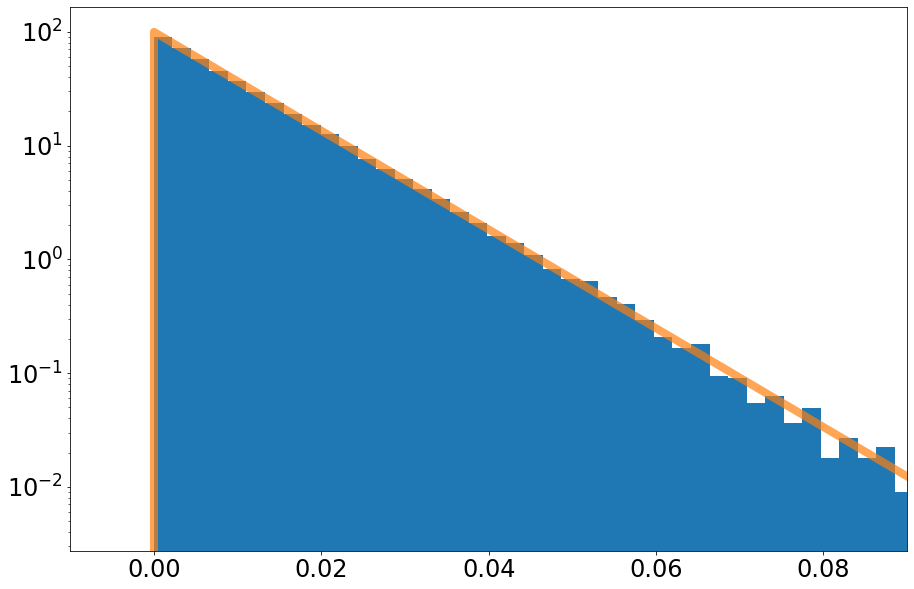

In [279]:
fig, ax = plt.subplots(1, 1)
ax.hist(d_expon,50, density=True)
plt.yscale('log')  #semi-log plot to show the ends clearer
plt.tick_params(labelsize = 24)
plt.xlim([-0.01,0.09])
x = np.linspace(-0.01,0.09,1000)
ax.plot(x,stats.expon.pdf(x,loc = 0., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

# 3
## A
We choose our value to be 0.075.

In [62]:
#Choose a value
hypo_value = 0.075

## B
**Question:**

If there's no signal, and the signal-free data has an exponential distribution, what's the probability that the data produces a signal that's equally or more signal-like than what I observed?

## C
Prob = $\int_{0.075}^\infty \mathrm{e}^{-x}\mathrm{d}x$

## D

In [248]:
#We want the probability that's more signal like, so we'll need to integrate in the opposite direction as the cdf, from hypo_value to +inf
#sf is (1 - cdf) but sometimes more accurate
prob = stats.expon.sf(hypo_value, loc=0., scale=0.01)
prob

0.0005530843701478336

## E

In [243]:
#Convert to sigma: use norm ppf
sigma_exp = (stats.norm.ppf(prob, loc=0., scale=1))*-1
sigma_exp

3.262031441032724

# 4

In [244]:
#Trying with different values
hypo2 = 0.025

prob2 = stats.expon.sf(hypo2, loc=0., scale=0.01)
print(prob2)
sigma_exp2 = (stats.norm.ppf(prob2, loc=0., scale=1))*-1
print(sigma_exp2)

0.0820849986238988
1.3911828143255687


In [245]:
hypo3 = 0.15

prob3 = stats.expon.sf(hypo3, loc=0., scale=0.01)
print(prob3)
sigma_exp3 = (stats.norm.ppf(prob3, loc=0., scale=1))*-1
print(sigma_exp3)

3.059023205018258e-07
4.987453103376043


In [280]:
hypo4 = 0.5

prob4 = stats.expon.sf(hypo4, loc=0., scale=0.01)
print(prob4)
sigma_exp4 = (stats.norm.ppf(prob4, loc=0., scale=1))*-1
print(sigma_exp4)

1.9287498479639178e-22
9.674825283612355


### Observation:
   I found that a larger numerical measurement correspond to a smaller probability and a 'larger' sigma value.
   This is because the more extreme our measurement is, the less likely it is for the data to produce a signal that's equally or more signal like than what I would observe when there's no signal and the signal-free data has an exponential distribution.

# Non-continuous distributions
I will be doing the Binomial distribution.

# A

A binomial distribution is a discrete probability distribution of the number of successes of **n** independent experiments with only true-false answers (boolean).
    
Each experiment have a probability of **p** to be true. (and thus **(1-p)** probability to be false)

# B

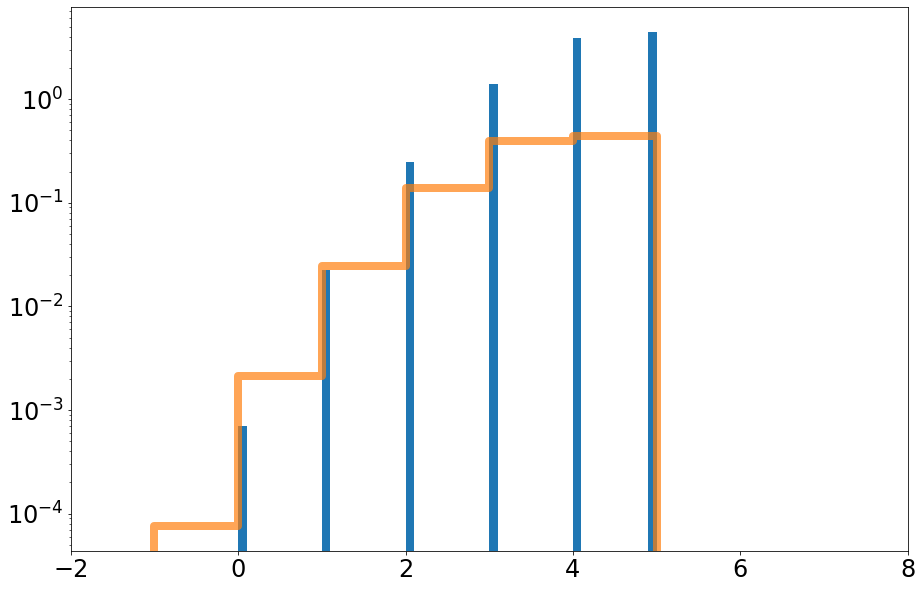

In [229]:
n = 5
p = 0.85

d_binom = stats.binom.rvs(n, p, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d_binom,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-2,8])
x = np.arange(-2,8)
ax.step(x,stats.binom.pmf(x, n, p),linewidth = 8,alpha = 0.7)
plt.show()

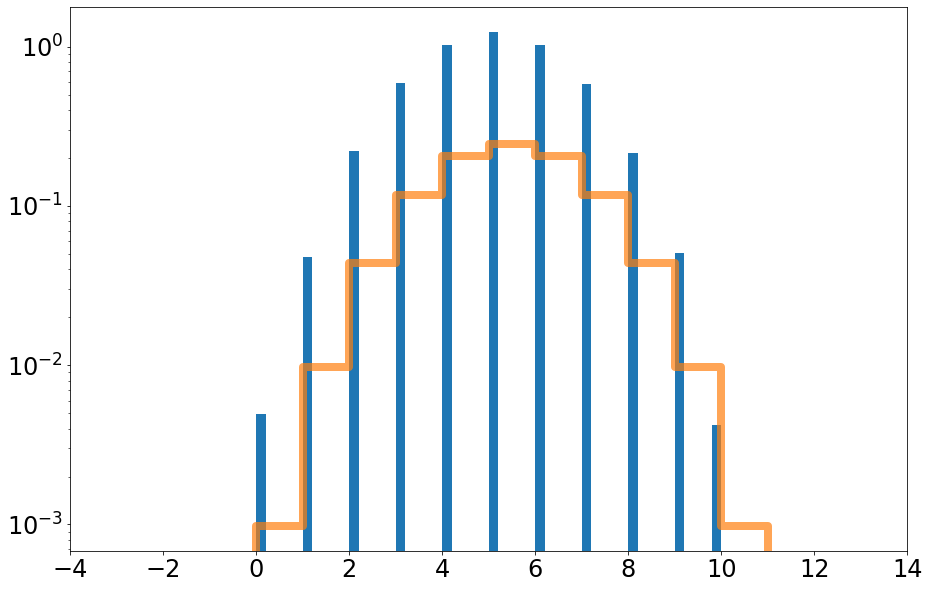

In [230]:
n = 10
p = 0.50

d_binom = stats.binom.rvs(n, p, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d_binom,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-4,14])
x = np.arange(-4,14)
ax.step(x,stats.binom.pmf(x, n, p, loc = 1),linewidth = 8,alpha = 0.7)
plt.show()

[2.38109454e-04 2.30172472e-03 1.07413820e-02 3.22241460e-02
 6.98189831e-02 1.16364972e-01 1.55153296e-01 1.69929800e-01
 1.55768983e-01 1.21153654e-01 8.07691025e-02 4.65034227e-02
 2.32517113e-02 1.01353614e-02 3.86109004e-03 1.28703001e-03
 3.75383754e-04 9.56860549e-05 2.12635678e-05 4.10349553e-06
 6.83915922e-07 9.77022746e-08 1.18426999e-08 1.20143333e-09
 1.00119444e-10 6.67462960e-12 3.42288697e-13 1.26773592e-14
 3.01841885e-16 3.46944695e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


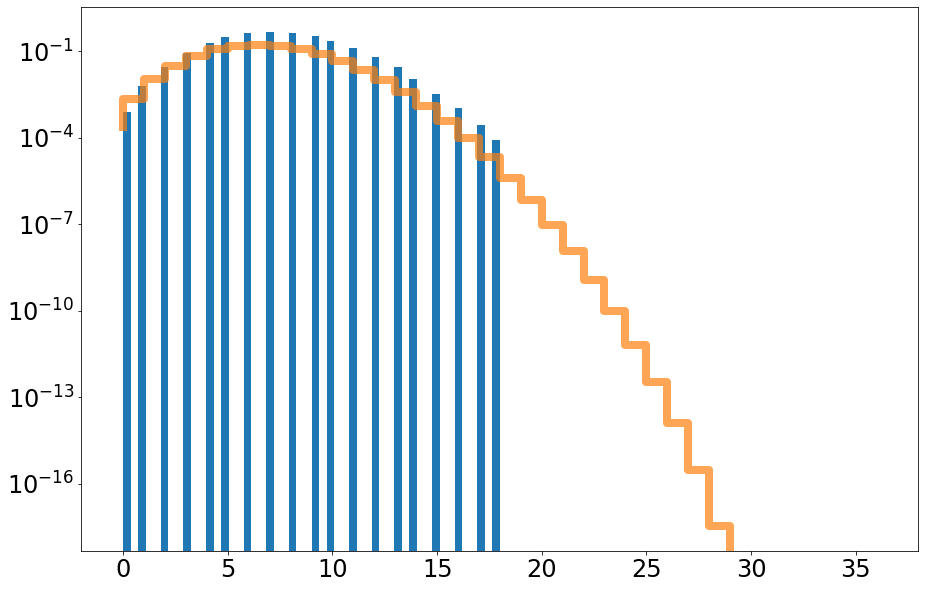

In [239]:
n = 29
p = 0.25

d_binom = stats.binom.rvs(n, p, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d_binom,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-2,38])
x = np.arange(0,38)
ax.step(x,stats.binom.pmf(x, n, p),linewidth = 8,alpha = 0.7)
print(stats.binom.pmf(x, n, p))
plt.show()

We can see from the 3 examples above that the binomial distribution function is a stepwise function, with the **n** value determining the endpoint of our functions.

The p value determines the relative location of the peak of the function.

Unlike the continuous normal and exponential distributions, the curves of binomial distribution describe the histogram much less accurately, under the same sample size (100k).

# C

**Question**:
    Supposed I observed a value 8 If there's no signal, and the signal-free data has an binomial distribution as in the 2nd graph, what's the probability that the data produces a signal that's equally or more signal-like than what I observed?

Prob = $\sum_{k=8}^{10} p_k$

In [209]:
n = 10
p = 0.5

prob = 0
for k in range (8,10):
    prob += stats.binom.pmf(k, n, p)
print(prob)

0.0537109375


In [214]:
sigma_binom = (stats.norm.ppf(prob, loc=0., scale=1)) * -1
print(sigma_binom)

1.6098899884187632


# D

The probability integrals become sums for discrete distributions, and sums of discrete values yield discrete probabilties.
'Sigmas' also become discrete as 'sigma' has a one-on-one relationship to the probability.

Discrete distributions can be used to describe experiments that only yield discrete data. For instance, an quantum experiment involving Spin-1 particles can only yield energies of $-\hbar$, 0, and $\hbar$. No values in between are allowed because quantization requires each energy level separated by $\hbar$.

## E
The mean of a discrete distribution is continuous because the probability *of the experiment itself* **p** can be continuous.

For instance, a perfectly symmetrical coin has probability **p = 0.500** to land on heads. But by changing the mass distribution and/or other features of the coin, we could manufacture coins whose p ranges from **any real number** between 0 and 1. The continuous nature of *the experiment's own* probability leads to a continuous mean.

Mean change continuously. Probability and 'sigma' change discretely.